In [144]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [145]:
df = pd.read_csv('/content/train (1).csv',usecols=[1,5,9])

In [146]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [147]:


df['Age'] = df['Age'].fillna(df['Age'].mean())


In [148]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [149]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['Survived'],axis=1),df['Survived'],test_size=0.2,random_state=42)

In [150]:
x_train.shape,x_test.shape

((712, 2), (179, 2))

In [151]:
dt1 = DecisionTreeClassifier()
lr1 = LogisticRegression()

dt1.fit(x_train,y_train)
lr1.fit(x_train,y_train)

y_pred = dt1.predict(x_test)
y_pred1 = lr1.predict(x_test)


In [152]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred1))

0.6703910614525139
0.6480446927374302


In [153]:
print(cross_val_score(dt1,x_train,y_train,cv=10,scoring='accuracy').mean())
print(cross_val_score(lr1,x_train,y_train,cv=10,scoring='accuracy').mean())

0.6137323943661972
0.6557902973395932


In [154]:
ft = FunctionTransformer(func=np.log1p)

ft.fit(x_train)

x_train_tranformed = ft.transform(x_train)
x_test_transformed = ft.transform(x_test)

In [155]:
dt = DecisionTreeClassifier()
lr = LogisticRegression()

dt.fit(x_train_tranformed,y_train)
lr.fit(x_train_tranformed,y_train)

y_predict = dt.predict(x_test_transformed)
y_predict1 = lr.predict(x_test_transformed)



In [156]:
print(accuracy_score(y_test,y_predict))
print(accuracy_score(y_test,y_predict1))

0.6759776536312849
0.6815642458100558


In [157]:
print(cross_val_score(dt,x_train_tranformed,y_train,cv=10,scoring='accuracy').mean())
print(cross_val_score(lr,x_train_tranformed,y_train,cv=10,scoring='accuracy').mean())

0.6235719874804382
0.6783646322378717


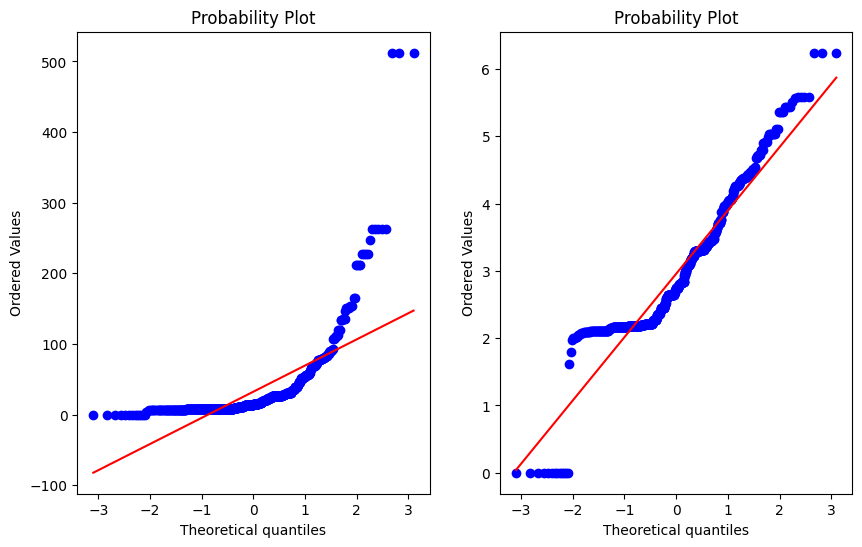

In [158]:
plt.figure(figsize=(10,6))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.subplot(122)
stats.probplot(x_train_tranformed['Fare'],dist='norm',plot=plt)
plt.show()


/tmp/ipython-input-159-820841426.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])
/tmp/ipython-input-159-820841426.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_tranformed['Fare'],color='green')


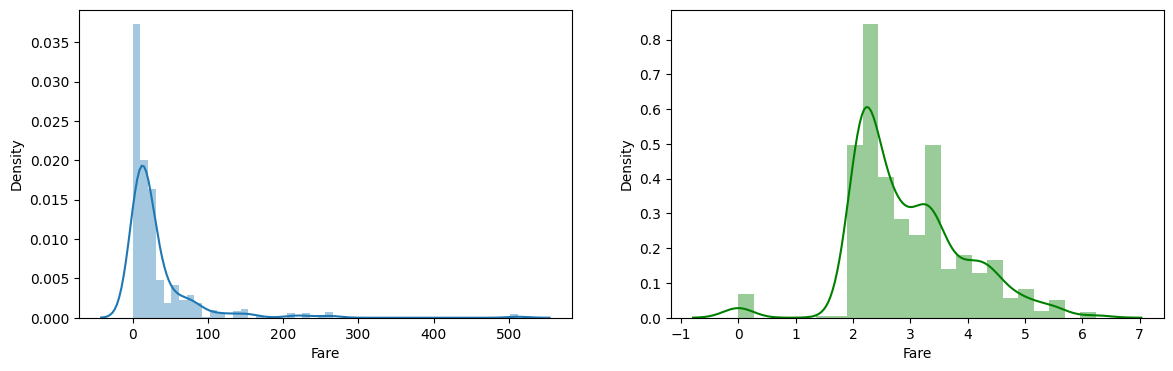

In [159]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.subplot(122)
sns.distplot(x_train_tranformed['Fare'],color='green')
plt.show()

/tmp/ipython-input-160-1158200785.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])
/tmp/ipython-input-160-1158200785.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_tranformed['Age'],color='red')


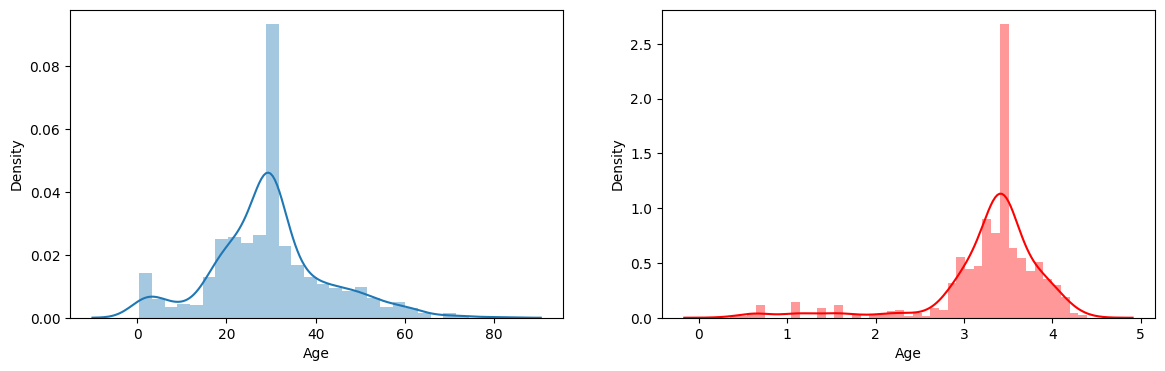

In [160]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.subplot(122)
sns.distplot(x_train_tranformed['Age'],color='red')
plt.show()